<a href="https://colab.research.google.com/github/ashhwiithac22/Deep-Learning-Experiments/blob/main/DL_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download.png to download.png


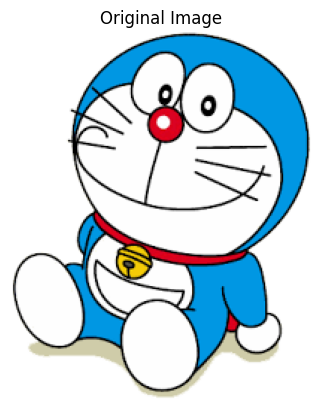

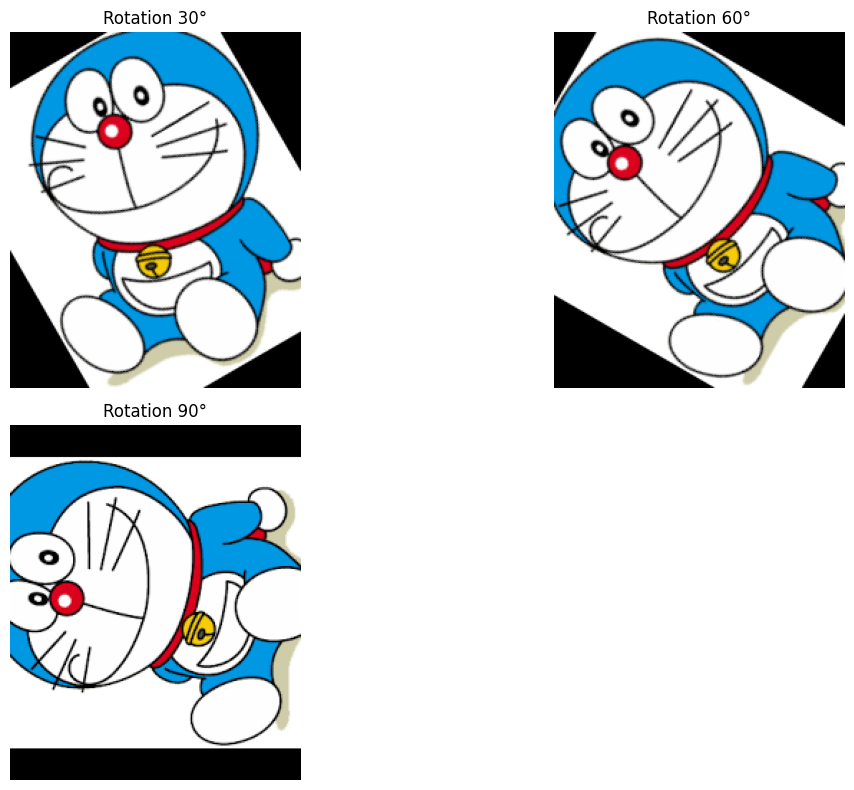

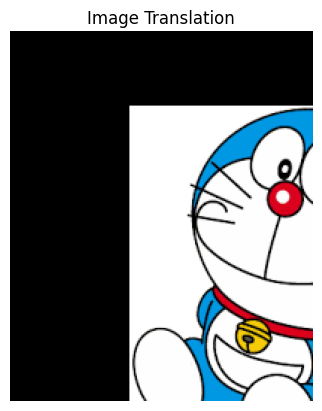

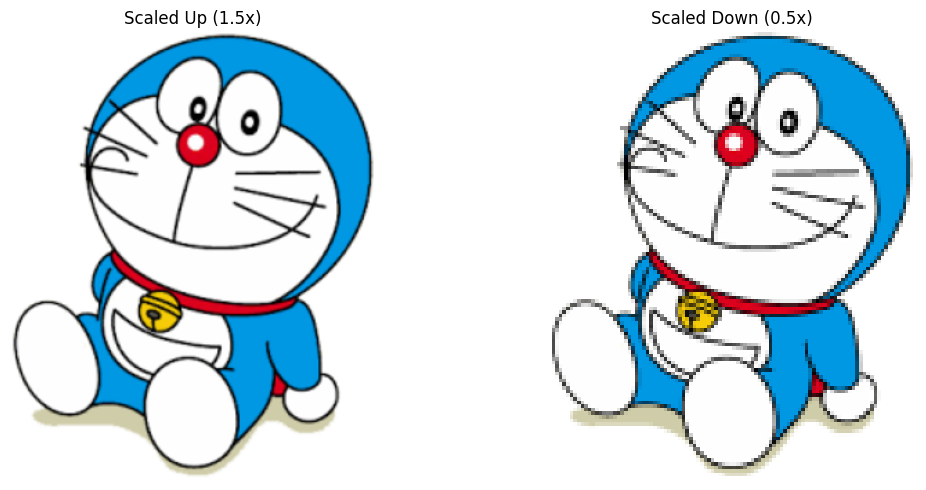

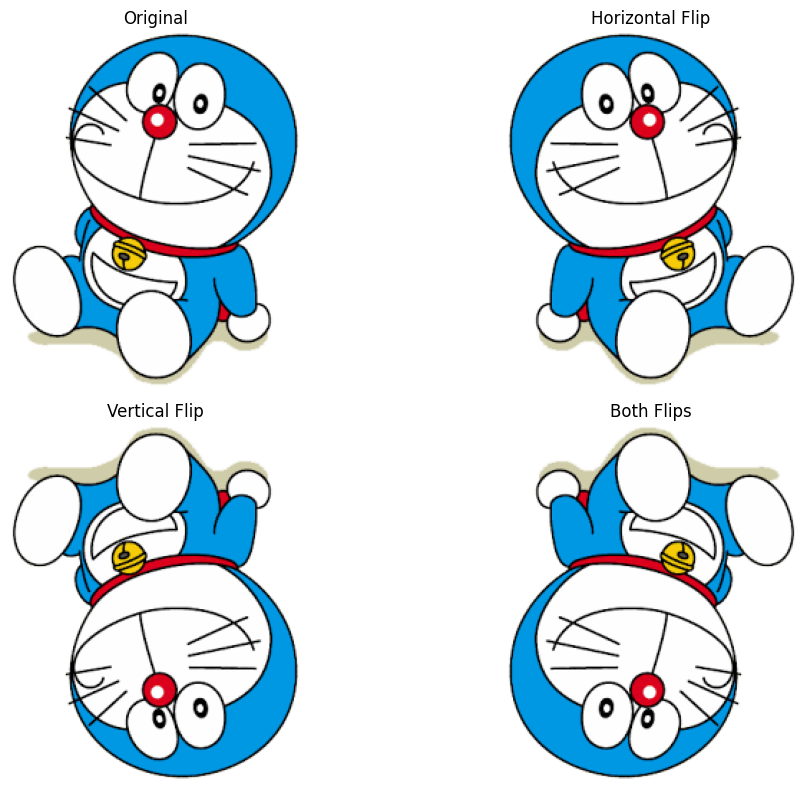

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()
filename = list(uploaded.keys())[0] #gets the name of the file the user uploaded

img = cv2.imread(filename) #extracts the file name
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img) #shows the original image
plt.title("Original Image")
plt.axis("off")
plt.show()

h, w = img.shape[:2] #extracts height and width of the image from (height, weight, color channels)

#rotating image around the center by creating a matrix
def rotate_image(image, angle): #rotates the image by any angle
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1) #600//2, 400//2 = 2, 300, 200, 1 -> keeps the original image and not zooming
    rotated = cv2.warpAffine(image, M, (w, h)) #uses height and weight as same size of the image
    return rotated

rotate_30 = rotate_image(img, 30) #rotates the image by 30 degrees
rotate_60 = rotate_image(img, 60) #rotates the image by 60 degrees
rotate_90 = rotate_image(img, 90) #rotates the image by 90 degrees

plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(rotate_30); plt.title("Rotation 30°"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(rotate_60); plt.title("Rotation 60°"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(rotate_90); plt.title("Rotation 90°"); plt.axis("off")
plt.tight_layout() #prevents overlap between images
plt.show()


#Translation -> shifting the entire image to new position
Tx, Ty = 80, 50 #moves 80 pixels right and 50 pixels down
T = np.float32([[1, 0, Tx],[0, 1, Ty]]) #opencv does internal calculation so it expects the matrix to be in float 1,0 and 0,1 keeps the image size unchanged
translated = cv2.warpAffine(img, T, (w, h))

plt.imshow(translated)
plt.title("Image Translation")
plt.axis("off")
plt.show()

#Image Scaling
scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5)   # enlarging width by 150%, desired size is None
scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5) # height is reduced by 50%

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(scaled_up); plt.title("Scaled Up (1.5x)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(scaled_down); plt.title("Scaled Down (0.5x)"); plt.axis("off")
plt.tight_layout()
plt.show()

# 5. Image Flipping
flip_h = cv2.flip(img, 1)   # flips horizontally
flip_v = cv2.flip(img, 0)   # flips vertically
flip_b = cv2.flip(img, -1)  # flips both horizontally and vertically

plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(flip_h); plt.title("Horizontal Flip"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(flip_v); plt.title("Vertical Flip"); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(flip_b); plt.title("Both Flips"); plt.axis("off")
plt.tight_layout()
plt.show()
